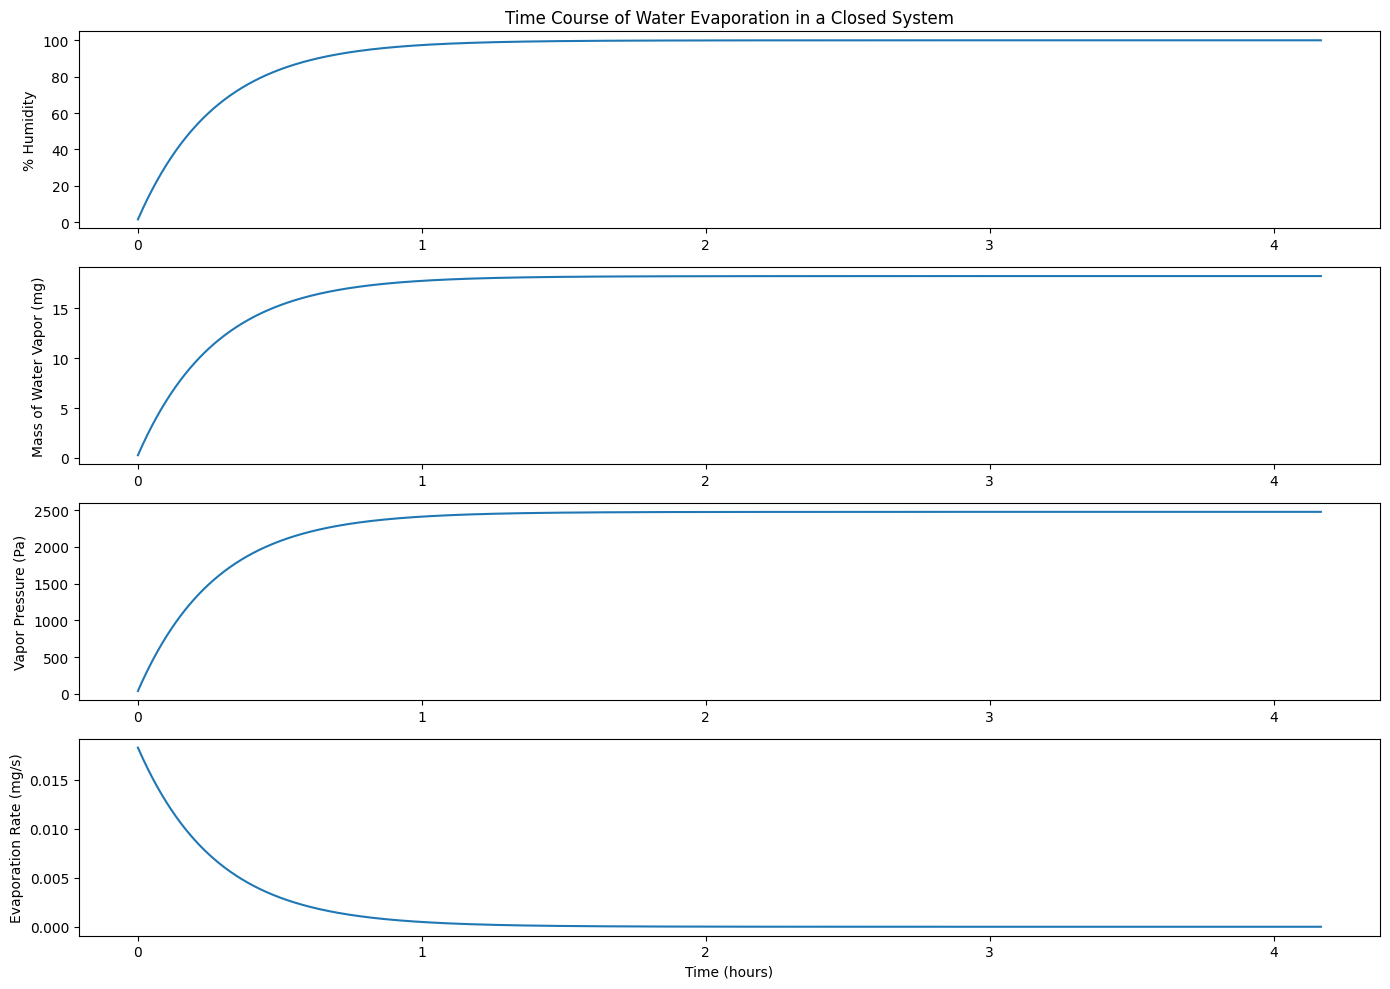

In [19]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import R

# Define constants
MOLAR_MASS_WATER = 18.01528  # g/mol
R_J_PER_MOL_K = 8.314462618  # J/(mol*K)
WATER_DENSITY = 997  # kg/m^3 at 25°C

# Function to calculate equilibrium vapor pressure using Antoine equation
def calculate_vapor_pressure(T):
    # Constants for water from Antoine equation
    A = 8.07131
    B = 1730.63
    C = 233.426
    T_C = T - 273.15  # Convert to Celsius
    vapor_pressure = 10**(A - (B / (T_C + C))) * 133.322  # Convert from mmHg to Pa
    return vapor_pressure

# Function to simulate time course of evaporation
def simulate_evaporation(volume_bottle, volume_water, temperature, total_pressure, time_steps, dt, evaporation_rate_constant):
    # Convert inputs to appropriate units
    volume_bottle_liters = volume_bottle  # Already in liters
    volume_water_liters = volume_water * 1e-3  # Convert from milliliters to liters
    temperature_K = temperature + 273.15  # Convert to Kelvin

    # Initial conditions
    vapor_pressure = calculate_vapor_pressure(temperature_K)
    mass_water = volume_water_liters * WATER_DENSITY * 1000  # Convert to grams
    n_water_initial = mass_water / MOLAR_MASS_WATER  # Initial moles of liquid water

    # Arrays to store time course data
    time_array = np.linspace(0, time_steps * dt, time_steps)
    mass_vapor_array = np.zeros(time_steps)
    pressure_array = np.zeros(time_steps)
    humidity_array = np.zeros(time_steps)
    evaporation_rate_array = np.zeros(time_steps)

    n_vapor = 0  # Start with no water vapor
    for t in range(time_steps):
        partial_pressure_vapor = (n_vapor * R_J_PER_MOL_K * temperature_K) / (volume_bottle_liters * 1e-3)  # Pa

        if partial_pressure_vapor < vapor_pressure:
            evaporation_rate = evaporation_rate_constant * (vapor_pressure - partial_pressure_vapor)
            dn_vapor = evaporation_rate * dt * (volume_bottle_liters * 1e-3) / (R_J_PER_MOL_K * temperature_K)
            n_vapor += dn_vapor

            if n_vapor > n_water_initial:
                n_vapor = n_water_initial  # Do not exceed the available water

        mass_vapor = n_vapor * MOLAR_MASS_WATER
        partial_pressure_vapor = (n_vapor * R_J_PER_MOL_K * temperature_K) / (volume_bottle_liters * 1e-3)
        humidity = (partial_pressure_vapor / vapor_pressure) * 100  # % RH

        # Store results
        mass_vapor_array[t] = mass_vapor * 1000  # Convert to mg
        pressure_array[t] = partial_pressure_vapor
        humidity_array[t] = humidity
        evaporation_rate_array[t] = dn_vapor * MOLAR_MASS_WATER * 1000 / dt  # Convert to mg/s

    return time_array, mass_vapor_array, pressure_array, humidity_array, evaporation_rate_array

# Inputs
volume_bottle = 1.0  # in liters
volume_water = 1.0  # in milliliters
temperature = 21  # in Celsius
total_pressure = 1 * 101325  # in Pa (0.5 atm)
time_steps = 1000
dt = 15  # time step in seconds
evaporation_rate_constant = 1e-3  # Arbitrary constant to model evaporation rate (adjust as needed)

# Run the simulation
time_array, mass_vapor_array, pressure_array, humidity_array, evaporation_rate_array = simulate_evaporation(volume_bottle, volume_water, temperature, total_pressure, time_steps, dt, evaporation_rate_constant)

# Plot results
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(time_array/3600, humidity_array)
plt.title('Time Course of Water Evaporation in a Closed System')
plt.ylabel('% Humidity')

plt.subplot(4, 1, 2)
plt.plot(time_array/3600, mass_vapor_array)
plt.ylabel('Mass of Water Vapor (mg)')

plt.subplot(4, 1, 3)
plt.plot(time_array/3600, pressure_array)
plt.ylabel('Vapor Pressure (Pa)')

plt.subplot(4, 1, 4)
plt.plot(time_array/3600, evaporation_rate_array)
plt.ylabel('Evaporation Rate (mg/s)')
plt.xlabel('Time (hours)')

plt.tight_layout()
plt.show()
